<a href="https://colab.research.google.com/github/Kwangbin/statistic/blob/main/chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2차원 데이터의 정리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 두 데이터 사이의 관계를 나타내는 지표

In [16]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [17]:
cd drive/MyDrive/ml/statistic/

[Errno 2] No such file or directory: 'drive/MyDrive/ml/statistic/'
/content/drive/MyDrive/ml/statistic


In [18]:
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number')

In [19]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [27]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


### 共分散

공분산(共分散, 영어: covariance)은 2개의 확률변수의 선형 관계를 나타내는 값이다.

 만약 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 선형 상관성이 있다면 양수의 공분산을 가진다.

직사각형의 가로길이는 영어 점수의 편차, 세로는 수학 점수의 편차

공분산은 면적, 음의 면적도 가능(음의 상관)


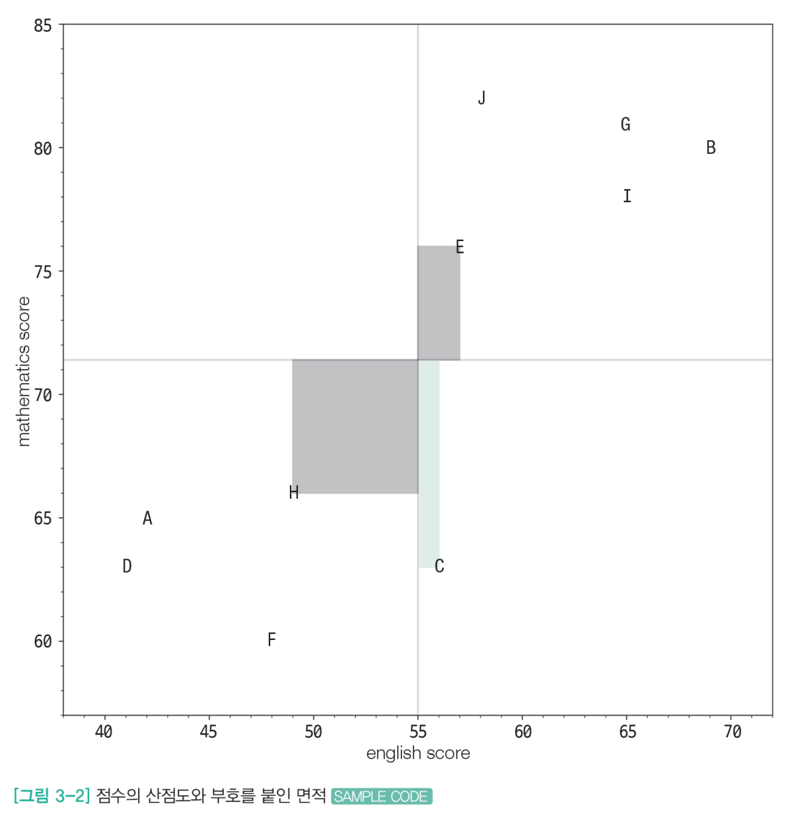

###양의상관관계
영어 점수가 높은 학생일수록 수학 점수가 높은 경향이 있다면 영어 점수와 수학 점수는 양의 상관 관계

###음의상관관계
영어 점수가 높은 학생일수록 수학 점수가 낮은 경향이 있다면 영어 점수와 수학 점수는 음의 상관 관계

###무상관
영어 점수가 수학 점수에 직접적으로 영향을 미치지 않을 때, 영어 점수와 수학 점수는 무상관


In [28]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

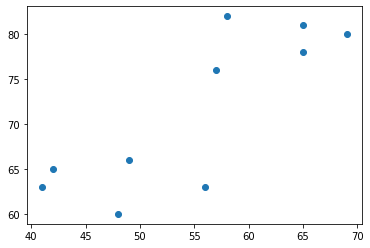

In [30]:
en=summary_df['english']
ma=summary_df['mathematics']
plt.scatter(en,ma)
plt.show()

In [31]:
summary_df['product of deviations'].mean()

62.800

In [32]:
#영어 분산
en_scores.var()

86.000

In [37]:
#수학분산
ma_scores.var()

68.440

In [38]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

x분산, 공분산

공분산, y분산


In [40]:
#1행 2열, 2행 1열 성분이 영어 수학의 공분산

cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [42]:
#1행 1열 영어 영어의 공분산  즉 영어의 분산
#2행 2열 수학 수학의 공분산  즉 수학의 분산

cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [43]:
np.var(en_scores), np.var(ma_scores)

(86.000, 68.440)

### 상관계수

공분산의 단위는 직감적으로 이해하기 어려우므로, 

단위에 의존하지 않는 상관을 나타내는 지표
시험 점수간의 공분산 (점수X점수), 키와 점수 (cm X 점수)


양의 상관은 1에 가까워지고, 음의 상관은 -1에 가까워지고, 무상관은 

In [44]:
np.cov(en_scores,ma_scores)

array([[95.556, 69.778],
       [69.778, 76.044]])

In [45]:
#수식으로 풀면
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

In [48]:
#NumPy의 corrcoef 함수(상관행렬의 [0,1] [1,0] 성분)

np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [49]:
#DataFrame의 corr 메서드

scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

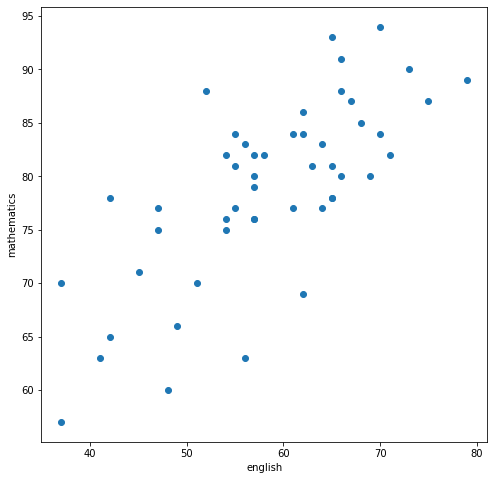

In [51]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 회귀직선

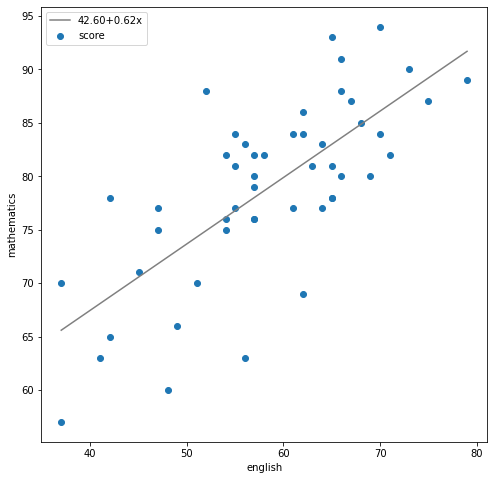

In [52]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

### 히트맵

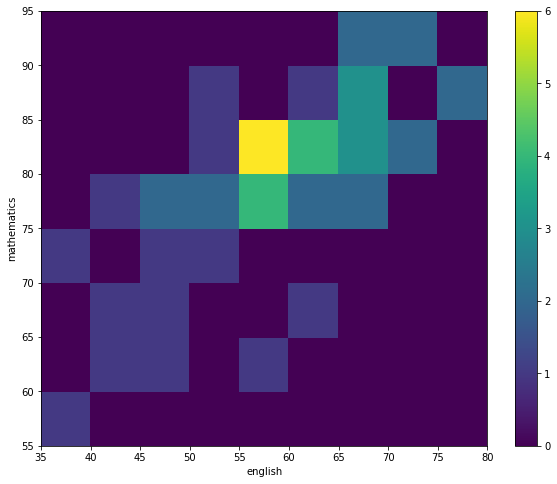

In [53]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

## 앤스컴의 예

In [55]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [56]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


모든 데이터의 기본 통계 값이 동일 하다

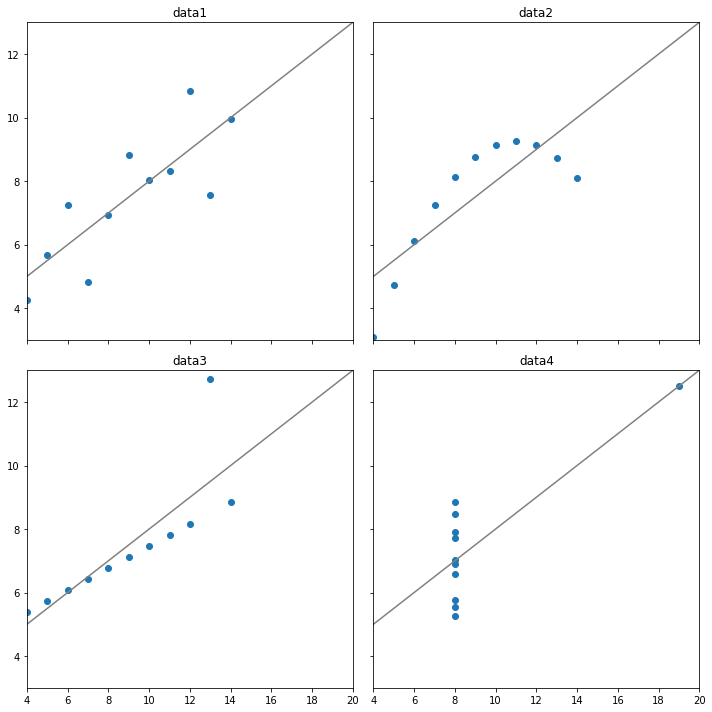

In [57]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

그렇지만 그래프로 확인 하면 다 다른 데이터 들이다